In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

Linear Regression of "GDP per capita" of different countries against "Life Satisfaction".
Where "GDP per capita" is x and "Life Satisfaction" is y ,i.e. Dependent variable

In [35]:
# Load the data
oecd_data = pd.read_csv("oecd_bli_2015.csv")
oecd_data_total = oecd_data[oecd_data["INEQUALITY"]=="TOT"]
oecd_data_total = oecd_data_total.pivot(index="Country", columns="Indicator", values="Value")

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0
Belgium,21.0,6.6,4.5,2.0,72.0,4.57,62.0,1.1,28307.0,83876.0,...,3.88,48082.0,94.0,2.2,74.0,509.0,15.71,89.0,87.0,18.9
Brazil,18.0,7.9,4.0,6.7,45.0,10.41,67.0,25.5,11664.0,6844.0,...,1.97,17177.0,90.0,1.6,69.0,402.0,14.97,79.0,72.0,16.3
Canada,15.0,1.3,10.5,0.2,89.0,3.94,72.0,1.5,29365.0,67913.0,...,0.90,46911.0,92.0,2.5,89.0,522.0,14.25,61.0,91.0,17.2


In [37]:
oecd_data_total.columns

Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')

In [41]:
y = oecd_data_total['Life satisfaction']

In [38]:
gdp_per_capita = pd.read_csv("gdp_per_capita.csv",thousands=',',delimiter='\t',encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)

In [39]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [40]:
gdp_per_capita.columns

Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', 'GDP per capita',
       'Estimates Start After'],
      dtype='object')

In [42]:
x = gdp_per_capita['GDP per capita']

In [44]:
y.shape

(190,)

In [47]:
x.shape

(37,)

In [56]:
#Since the shape of 'x' and 'y' are different, we need to perform inner join (intersection of two dataframes)
df = pd.merge(gdp_per_capita, oecd_data_total, on = 'Country')

In [57]:
df1 = df[['Country','GDP per capita', 'Life satisfaction']]
df1

,Country,GDP per capita,Life satisfaction
0,Australia,50961.865,7.3
1,Austria,43724.031,6.9
2,Belgium,40106.632,6.9
3,Brazil,8669.998,7.0
4,Canada,43331.961,7.3
5,Chile,13340.905,6.7
6,Czech Republic,17256.918,6.5
7,Denmark,52114.165,7.5
8,Estonia,17288.083,5.6
9,Finland,41973.988,7.4


In [58]:
x = df1['GDP per capita'].to_numpy()
y = df1['Life satisfaction'].to_numpy()

In [64]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

Text(0, 0.5, 'Life satisfaction')

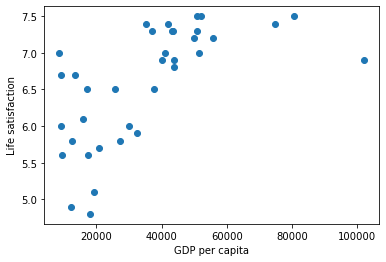

In [65]:
plt.scatter(x, y)
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")

In [66]:
model = sklearn.linear_model.LinearRegression()

In [67]:
model.fit(x, y)

LinearRegression()

In [72]:
#Predicting output for India
#GDP per capita of India is 1605 USD in 2015
x_india = [[1605]]
print(model.predict(x_india))

[[5.80022949]]


In [73]:
#Happiness Index of India is 4.77 in 2015

In [78]:
z = np.linspace(x.min(),x.max(),100)
z.reshape(-1,1)

array([[  8669.998     ],
       [  9612.66562626],
       [ 10555.33325253],
       [ 11498.00087879],
       [ 12440.66850505],
       [ 13383.33613131],
       [ 14326.00375758],
       [ 15268.67138384],
       [ 16211.3390101 ],
       [ 17154.00663636],
       [ 18096.67426263],
       [ 19039.34188889],
       [ 19982.00951515],
       [ 20924.67714141],
       [ 21867.34476768],
       [ 22810.01239394],
       [ 23752.6800202 ],
       [ 24695.34764646],
       [ 25638.01527273],
       [ 26580.68289899],
       [ 27523.35052525],
       [ 28466.01815152],
       [ 29408.68577778],
       [ 30351.35340404],
       [ 31294.0210303 ],
       [ 32236.68865657],
       [ 33179.35628283],
       [ 34122.02390909],
       [ 35064.69153535],
       [ 36007.35916162],
       [ 36950.02678788],
       [ 37892.69441414],
       [ 38835.3620404 ],
       [ 39778.02966667],
       [ 40720.69729293],
       [ 41663.36491919],
       [ 42606.03254545],
       [ 43548.70017172],
       [ 444

In [125]:
arr = np.empty(0)

In [126]:

for i in range(len(z)):
    a = model.predict([[z[i]]])
    arr = np.append(arr,a)
    


In [132]:
result = arr.reshape(-1,1)

Text(0, 0.5, 'Life satisfaction')

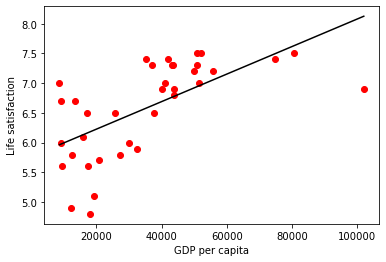

In [137]:
plt.scatter(x, y,color ='red')
plt.plot(z,result, color ='black')
plt.xlabel("GDP per capita")
plt.ylabel("Life satisfaction")